In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:\Users\Luka\OneDrive\Desktop\FER5\Projekt R\Projekt_Rnew\Projekt_R\OpenMATB\sessions\2024-01-09\Session 19\19_240109_183806.csv")
performance_data = data[data.apply(lambda row: row.astype(str).str.contains('performance', case=False).any(), axis=1)]
output_file_path = "C:\Users\Luka\OneDrive\Desktop\FER5\Projekt R\Projekt_Rnew\Projekt_R\OpenMATB\sessions\2024-01-09\Session 19\19_240109_183806_performance.csv"
performance_data.to_csv(output_file_path, index=False)
print(performance_data.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      logtime  scenario_time         type  module           address value
156  4.281453       0.228015  performance  resman    a_in_tolerance     1
157  4.281556       0.228015  performance  resman       a_deviation     0
158  4.281601       0.228015  performance  resman    b_in_tolerance     1
159  4.281645       0.228015  performance  resman       b_deviation     0
170  4.299671       0.228015  performance   track        joystick_x     0
171  4.299717       0.228015  performance   track        joystick_y     0
194  4.320936       0.267334  performance   track        joystick_x     0
195  4.320971       0.267334  performance   track        joystick_y     0
196  4.321043       0.267334  performance   track  cursor_in_target     1
197  4.321087       0.267334  performance   track  center_deviation   0.0


## Track - sekcija

In [5]:
from sklearn.model_selection import train_test_split
track_data = performance_data[
    performance_data.apply(
        lambda row: row.astype(str).str.contains('track', case=False).any() and
                    row.astype(str).str.contains('center_deviation', case=False).any(),
        axis=1
    )
]

track_data['value'] = pd.to_numeric(track_data['value'], errors='coerce')
numeric_columns = track_data.select_dtypes(include='number').columns.tolist()
track_data_encoded = track_data[numeric_columns]
print(track_data_encoded)


          logtime  scenario_time     value
197      4.321087       0.267334  0.000000
332      4.382223       0.325491  1.943399
339      4.404469       0.350782  2.915022
346      4.438914       0.385101  2.481451
352      4.472162       0.418391  2.057138
...           ...            ...       ...
82271  303.951741     299.898044  1.320671
82277  303.985162     299.931439  1.541058
82295  304.018587     299.964773  0.842325
82301  304.051740     299.998026  0.303159
82310  304.085095     300.031380  1.270828

[8999 rows x 3 columns]


<ipython-input-5-56b695955576>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_data['value'] = pd.to_numeric(track_data['value'], errors='coerce')


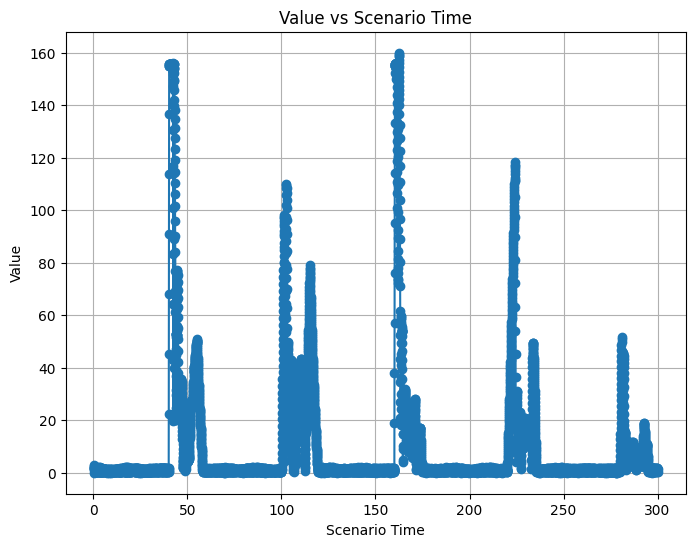

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(track_data_encoded['scenario_time'], track_data_encoded['value'], marker='o', linestyle='-')
plt.xlabel('Scenario Time')
plt.ylabel('Value')
plt.title('Value vs Scenario Time')
plt.grid(True)
plt.show()

In [7]:
y_track = track_data_encoded['value'].values
X_track = track_data_encoded.drop(columns=['value'])
X_train, X_test, y_train, y_test = train_test_split(X_track, y_track, test_size=0.2, shuffle=False)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
from keras.optimizers import Adam
import keras as keras

time_steps = 100
X_train_sequence = []
y_train_sequence = []
for i in range(len(X_train) - time_steps):
    X_train_sequence.append(X_train.iloc[i:i+time_steps].values)
    y_train_sequence.append(y_train[i+time_steps])

X_train_sequence = np.array(X_train_sequence)
y_train_sequence = np.array(y_train_sequence)
y_train_sequence = np.asarray(y_train_sequence).astype(np.float32)
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_sequence.shape[1], X_train_sequence.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Dense(1))
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train_sequence, y_train_sequence, epochs=20, batch_size=8)



Epoch 1/20
888/888 [==============================] - 101s 110ms/step - loss: 696.6192
Epoch 2/20
888/888 [==============================] - 95s 107ms/step - loss: 684.1454
Epoch 3/20
888/888 [==============================] - 96s 108ms/step - loss: 675.8638
Epoch 4/20
888/888 [==============================] - 95s 108ms/step - loss: 652.9172
Epoch 5/20
888/888 [==============================] - 97s 109ms/step - loss: 651.7758
Epoch 6/20
888/888 [==============================] - 97s 109ms/step - loss: 643.7288
Epoch 7/20
888/888 [==============================] - 95s 106ms/step - loss: 689.2841
Epoch 8/20
888/888 [==============================] - 96s 108ms/step - loss: 692.9558
Epoch 9/20
888/888 [==============================] - 96s 108ms/step - loss: 651.6847
Epoch 10/20
888/888 [==============================] - 96s 108ms/step - loss: 625.0236
Epoch 11/20
888/888 [==============================] - 96s 108ms/step - loss: 640.3969
Epoch 12/20
888/888 [==============================

In [9]:
X_test_sequence = []
y_test_sequence = []
for i in range(len(X_test) - time_steps):
    X_test_sequence.append(X_test.iloc[i:i+time_steps].values)
    y_test_sequence.append(y_test[i+time_steps])

X_test_sequence = np.array(X_test_sequence)
y_test_sequence = np.array(y_test_sequence)
X_test_sequence = np.reshape(X_test_sequence, (X_test_sequence.shape[0], X_test_sequence.shape[1], X_test_sequence.shape[2]))

y_pred = model.predict(X_test_sequence)
mae = mean_absolute_error(y_test_sequence, y_pred)
print("Mean Absolute Error (MAE) on test set:", mae)

54/54 [==============================] - 4s 73ms/step
Mean Absolute Error (MAE) on test set: 9.689396651438168


## Resman - sekcija

In [10]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [11]:
resman_data = performance_data[
    performance_data.apply(
        lambda row: row.astype(str).str.contains('resman', case=False).any() and
                    row.astype(str).str.contains('a_deviation', case=False).any() or row.astype(str).str.contains('b_deviation', case=False).any(),
        axis=1
    )
]

resman_data['value'] = pd.to_numeric(resman_data['value'], errors='coerce')
resman_data = handle_non_numerical_data(resman_data)
numeric_columns = resman_data.select_dtypes(include='number').columns.tolist()
resman_data_encoded = resman_data[numeric_columns]
print(resman_data_encoded)

          logtime  scenario_time  type  module  address  value
157      4.281556       0.228015     0       0        0      0
159      4.281645       0.228015     0       0        1      0
790      6.287653       2.233965     0       0        0    -26
792      6.287691       2.233965     0       0        1    -26
1272     8.303965       4.250221     0       0        0    -52
...           ...            ...   ...     ...      ...    ...
80889  298.487782     294.433303     0       0        1    372
81437  300.503016     296.449258     0       0        0    212
81439  300.503124     296.449258     0       0        1    392
81935  302.519474     298.465310     0       0        0    232
81937  302.519532     298.465310     0       0        1    412

[298 rows x 6 columns]


<ipython-input-11-ac63121b5794>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resman_data['value'] = pd.to_numeric(resman_data['value'], errors='coerce')
<ipython-input-10-b413e177a75f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = list(map(convert_to_int, df[column]))


In [12]:
y_resman = resman_data_encoded['value'].values
X_resman = resman_data_encoded.drop(columns=['value'])
X_train_resman, X_test_resman, y_train_resman, y_test_resman = train_test_split(X_resman, y_resman, test_size=0.2, shuffle=False)

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
from keras.optimizers import Adam
import keras as keras

time_steps = 10
X_train_sequence_resman = []
y_train_sequence_resman = []
for i in range(len(X_train_resman) - time_steps):
    X_train_sequence_resman.append(X_train_resman.iloc[i:i+time_steps].values)
    y_train_sequence_resman.append(y_train_resman[i+time_steps])

X_train_sequence_resman = np.array(X_train_sequence_resman)
y_train_sequence_resman = np.array(y_train_sequence_resman)
y_train_sequence_resman = np.asarray(y_train_sequence_resman).astype(np.float32)
model_resman = Sequential()
model_resman.add(LSTM(units=10, return_sequences=True, input_shape=(X_train_sequence_resman.shape[1], X_train_sequence_resman.shape[2])))
model_resman.add(Dropout(0.2))
model_resman.add(LSTM(20, return_sequences=False))
model_resman.add(Dropout(0.2))
model_resman.add(Dense(1))
optimizer = Adam(lr=0.0001)

model_resman.compile(optimizer=optimizer, loss='mean_squared_error')
model_resman.fit(X_train_sequence_resman, y_train_sequence_resman, epochs=20, batch_size=8)



Epoch 1/20
29/29 [==============================] - 3s 6ms/step - loss: 58135.9336
Epoch 2/20
29/29 [==============================] - 0s 7ms/step - loss: 57882.3711
Epoch 3/20
29/29 [==============================] - 0s 7ms/step - loss: 57426.2539
Epoch 4/20
29/29 [==============================] - 0s 7ms/step - loss: 57061.5703
Epoch 5/20
29/29 [==============================] - 0s 7ms/step - loss: 56678.7070
Epoch 6/20
29/29 [==============================] - 0s 6ms/step - loss: 56327.5117
Epoch 7/20
29/29 [==============================] - 0s 6ms/step - loss: 56078.6641
Epoch 8/20
29/29 [==============================] - 0s 6ms/step - loss: 55868.4180
Epoch 9/20
29/29 [==============================] - 0s 7ms/step - loss: 55700.2227
Epoch 10/20
29/29 [==============================] - 0s 7ms/step - loss: 55524.9883
Epoch 11/20
29/29 [==============================] - 0s 7ms/step - loss: 55344.5625
Epoch 12/20
29/29 [==============================] - 0s 6ms/step - loss: 55200.1484
E

In [14]:
X_test_sequence_resman = []
y_test_sequence_resman = []
for i in range(len(X_test_resman) - time_steps):
    X_test_sequence_resman.append(X_test_resman.iloc[i:i+time_steps].values)
    y_test_sequence_resman.append(y_test_resman[i+time_steps])

X_test_sequence_resman = np.array(X_test_sequence_resman)
y_test_sequence_resman = np.array(y_test_sequence_resman)
X_test_sequence_resman = np.reshape(X_test_sequence_resman, (X_test_sequence_resman.shape[0], X_test_sequence_resman.shape[1], X_test_sequence_resman.shape[2]))

y_pred_resman = model_resman.predict(X_test_sequence_resman)
mae_resman = mean_absolute_error(y_test_sequence_resman, y_pred_resman)
print("Mean Absolute Error (MAE) on test set:", mae_resman)

2/2 [==============================] - 1s 6ms/step
Mean Absolute Error (MAE) on test set: 143.0853918838501
